# Mappeoppgave 2

#### Informasjon om oppgaven
Når du besvarer oppgaven, husk: 
- les oppgaveteksten nøye
- kommenter koden din
- sett navn på akser og lignende i figurene
- skriv hvor du har hentet kodesnutter fra, hvis du gjør det
- bruk engelske variabelnavn og vær konsistent med hvordan du bruker store og små bokstaver
- bruk mest mulig funksjoner for ting som kan repeteres
- En kort kode kan være en bra kode, så ikke gjør det mer komplisert enn det spørres om.

Du kan få full pott uten å svare på oppgaven som er markert "ekstrapoeng". Du blir likevel belønnet for denne (dvs. hvis du har noen feil og får 45 poeng totalt, så kan du få en høyere poengsum hvis du også har svart på "ekstrapoeng". 

#### Innlevering av oppgavene
Du skal levere begge mappene samtidig (det vil si denne oppgaven og mappe 1). Innleveringsfristen er 6 desember kl 13:00. 
Begge oppgavene skal leveres i github (som jupyter-fil) og wiseflow (som PDF). Bruk navnet  "SOK-1003-eksamen-2022-mappe2" på filene.
- For github: Husk å gi meg (brukernavn "okaars") tilgang til github-reposetoriet deres. Hvis dere har satt reposetoriet til public (anbefales ikke), må dere dele lenken til dette på ole.k.aars@uit.no
- For wiseflow: En person fra hver gruppe (for hver mappeoppgave), leverer inn. Ved innlevering kan du krysse av hvem som er på gruppen din 

Se generell informasjon om hvordan man leverer oppgaven <th><a href='https://uit-sok-1003-h22.github.io/semesteroppgave.html'>her</a>.
    
<b> NB!:</b> En person fra gruppa må <a href='https://docs.google.com/forms/d/e/1FAIpQLSeljUukzUU5d-VbxyM4C0x4WUplhUKBCU5wIpPZl_bP5kN71A/viewform?usp=sf_link'> fylle ut dette skjemaet </a>  for å melde om hvem som er på gruppa. Dere vil i etterkant motta en epost om tidspunkt for presentasjon. 
    
#### Presentasjon
Presentasjonen innebærer en kort gjennomgang av oppgaven (10-15 min) etterfulgt av kommentarer fra meg (10-15 min). Alle gruppemedlemmer skal bidra til presentasjonen. Det er anbefalt å laste opp besvarelsen på github forut for presentasjonen (helst to dager før) slik at jeg har mulighet til å lese gjennom. Dere vil ha mulighet til å endre besvarelsen etter presentasjonen, frem til endelig innlevering 6 desember.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import sympy as sym
from sympy.solvers import solve
from cycler import cycler

# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


### Oppgave 1 (10 poeng)

a) Vi skal spille et spill der vi kaster en terning 6 ganger. Lag en funksjon med "for-løkke" som printer alle terningene som har blitt kastet. Du kan bruke `np.random.randint()` til å lage tilfeldige tall

In [3]:
def die_roll(n_amount, die_min=1, die_max=7):
    die_list = []
    for n in range(n_amount):
        die_list.append(np.random.randint(die_min,die_max))
    return die_list

print(die_roll(6))

[3, 1, 5, 3, 3, 2]


b) Juster den samme funksjonen slik at den lagrer tallene i en liste før den printer ut selve listen. Dere kan kalle denne listen for `lot_numbers`. Dere kan vurdere å bruke `append()` som del av funksjonen. 

In [4]:
#I refer back to the previous task/assignment

def die_roll_lot_numbers(n_amount, die_min=1, die_max=7):
    lot_numbers = []
    for n in range(n_amount):
        lot_numbers.append(np.random.randint(die_min,die_max))
    return lot_numbers

print(die_roll_lot_numbers(6))


[2, 2, 3, 2, 4, 1]


c) Juster den samme funksjonen slik at den har to argument. Disse argumentene er to terningverdier som du "tipper" blir kastet. Bruk `if`, `else` og `elif` til å generere vinnertall. Resultatet fra funksjonen skal printe ut ulike setninger avhengig av om man får 0, 1 eller 2 rette. Setningene velger du selv, men de skal inneholde tallene som du tippet, og tallene som ble trukket.  

In [5]:
#Checks the guesses, create a map with data and calculate total score
def guess_check(guess_list,die_list):
    check_list = {}
    n=1
    total=0
    for guess,die in zip(guess_list,die_list):
        key = f"guess {n}"
        check_list[key] = {"guess":guess,"die":die,"check":bool(guess==die)}
        if guess==die:
            total += 1
        n+=1
    return check_list,total

#Print Score
def score(check_list,total):
    print(f"\n{'='*22}\n{'-'*8}SCORE{'-'*8}\n{'='*22}\n")
    for key in check_list.keys():
        print(f"{key}\n{'-'*8}")
        print(f"GUESS: {check_list[key]['guess']}")
        print(f"ROLL: {check_list[key]['die']}\n")
    print(f"TOTAL SCORE: {total}")

#guessing game control
def guessing_game(guesses=2, auto=False, die_min=1, die_max=7):
    guess_list = []
    die_list = die_roll(guesses,die_min=die_min,die_max=die_max)
    print("YOUR GUESSES")
    for n in range(guesses):
        display_text = f"Input Guess {n}: "
        if auto == False:
            guess_list.append(int(input(display_text)))
        else:
            auto_die = np.random.randint(die_min,die_max)
            guess_list.append(auto_die)
            print(f"{display_text}{auto_die}")
    check_list,total = guess_check(guess_list,die_list)
    score(check_list,total)

guessing_game(auto=False)#auto will guess for you, set to False if you want make your own guesses

YOUR GUESSES


Input Guess 0:  4
Input Guess 1:  3



--------SCORE--------

guess 1
--------
GUESS: 4
ROLL: 3

guess 2
--------
GUESS: 3
ROLL: 3

TOTAL SCORE: 1


### Oppgave 2 (10 poeng)
a) Du har nå begynt å spille lotto i stedet, og satser alt på ett vinnertall. Lag en while-løkke som printer ut tall helt til du har trukket riktig tall (som du definerer selv). For enkelthets skyld kan du begrense utfallsrommet av trekningene til mellom 0-30.

In [27]:
# if input data is out of range or incorrect type
def error_print(guess,min_roll,max_roll):
    print(f"\n!! {guess} is not a valid guess !!\n")
    print(f"MAKE A GUESS BETWEEN {min_roll} - {max_roll}")

# main function
def lotto(min_roll=1,max_roll=10):
    dice_list = []
    total_rolls=0
    n = 0
    
    print(f"MAKE A GUESS BETWEEN {min_roll} - {max_roll}")
    
    # checks and gets user input
    while True:
        try:
            guess = input('Your Guess: ')
            if (int(float(guess)) >= int(min_roll)) and (int(guess)<=int(max_roll)):
                break
            error_print(guess,min_roll,max_roll)
        except ValueError:
            error_print(guess,min_roll,max_roll)
    
    # rolles while n != guess
    while int(guess) != n:
        _n = np.random.randint(min_roll,max_roll+1)
        dice_list.append(_n)
        total_rolls+=1
        n = _n
        
    # create data dict
    lotto_data = {"GUESS":guess,"TOTAL ROLLS":total_rolls,"LIST":dice_list,"RANGE":[min_roll,max_roll]}
    return lotto_data

lotto_data = lotto()
print(f"Total Rolls: {lotto_data['TOTAL ROLLS']}")
print(lotto_data['LIST'])

MAKE A GUESS BETWEEN 1 - 10


Your Guess:  4


Total Rolls: 6
[1, 3, 6, 5, 3, 4]


b) Lag et plot av den while-løkken du nettopp lagde. Man blir belønnet om man; 
- bruker `scatter`; 
- lager plottet dynamisk (dvs at hver trekning vises hver for seg, og at x-aksen endrer seg etter en gitt verdi); 
- viser hvor når siste trekningen blir gjort (dvs at den vises kun når du har trukket vinnertallet).

Avhengig av hvordan du lager figuren din kan du får bruk for å importere pakkene `Ellipse`, `display`, `clear_output`.

In [7]:
#pakker som du kan få bruk for
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output

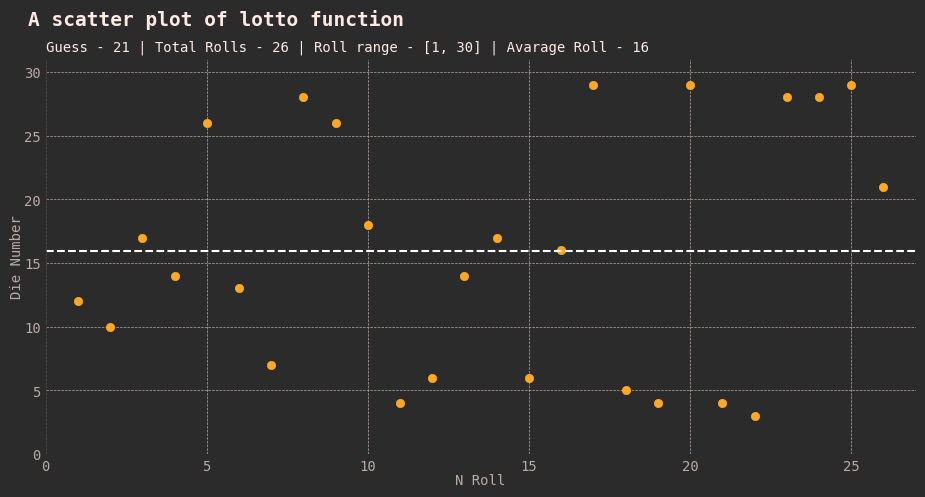

In [31]:
# calls last function
lotto_data = lotto(min_roll=1,max_roll=30) # set max and min roll range here
lotto_amount = np.linspace(0,lotto_data["TOTAL ROLLS"],lotto_data["TOTAL ROLLS"]+1)
average_roll = sum(lotto_data["LIST"])/lotto_data["TOTAL ROLLS"]

# label
suptitle = "A scatter plot of lotto function"
title = f"Guess - {lotto_data['GUESS']} | Total Rolls - {lotto_data['TOTAL ROLLS']} | Roll range - {lotto_data['RANGE']} | Avarage Roll - {int(round(average_roll,0))}"
label_x = "N Roll"
label_y = "Die Number"

# plot
fig, ax = plt.subplots(figsize=(10,5))
y_path = []
x_path = []

test_list = []

# animating
for i in range(0,lotto_data["TOTAL ROLLS"]):
    i = int(i)
    x_path.append(i+1)
    y_path.append(lotto_data["LIST"][i])
    
    average_roll = sum(y_path)/len(x_path)
    title = f"Guess - {lotto_data['GUESS']} | Total Rolls - {lotto_data['TOTAL ROLLS']} | Roll range - {lotto_data['RANGE']} | Avarage Roll - {int(round(average_roll,0))}"
    
    ax.scatter(x_path,y_path)
    plt.suptitle(suptitle,x=0.25,y=0.98,size=14,weight='bold')
    plt.title(title,loc="left",size=10)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
    plt.axhline(y = average_roll, color = 'w', linestyle = '--')

    display(fig)

    if i < lotto_data["TOTAL ROLLS"]-1:
        ax.cla()
    ax.set_ylim([lotto_data["RANGE"][0]-1,lotto_data["RANGE"][1]+1])
    ax.set_xlim([0,lotto_data["TOTAL ROLLS"]+1])
    clear_output(wait = True)

c) Ekstrapoeng: gjør det samme som i (b), men lag et histogram som vises ved siden av. Dette histogrammet skal vise hvor mange ganger de ulike tallene ble trekt. Bruk `plt.hist` til dette. Husk at du må definere figur og akseobjekt først.  

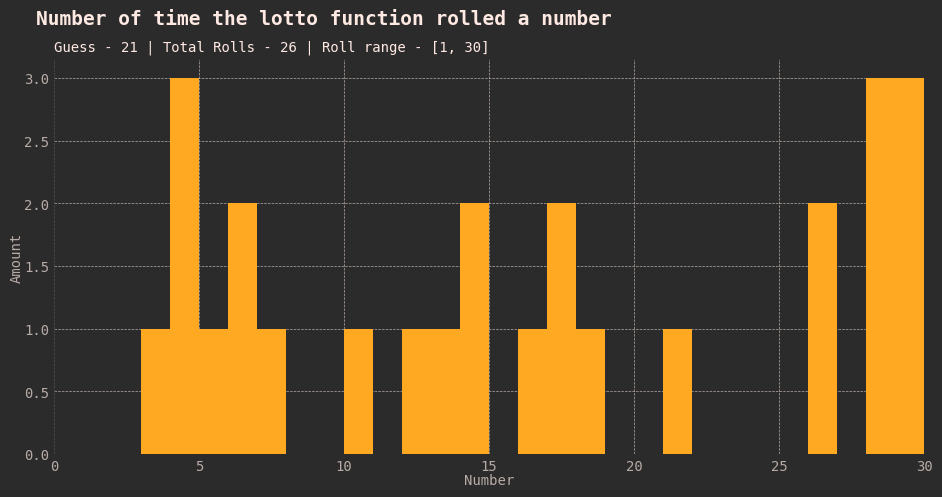

In [32]:
# label
suptitle = "Number of time the lotto function rolled a number"
title = f"Guess - {lotto_data['GUESS']} | Total Rolls - {lotto_data['TOTAL ROLLS']} | Roll range - {lotto_data['RANGE']}"
label_x = "Number"
label_y = "Amount"

# plot
fig2, ax2 = plt.subplots(figsize=(10,5))
n_amount = []
bins = np.linspace(lotto_data["RANGE"][0],lotto_data["RANGE"][1],lotto_data["RANGE"][1])
plt.ylabel(label_y)
plt.xlabel(label_x)

# ani
for i in range(0,lotto_data["TOTAL ROLLS"]):
    i = int(i)
    n_amount.append(lotto_data["LIST"][i])
    
    ax2.hist(n_amount,bins=bins)
    plt.suptitle(suptitle,x=0.35,y=0.98,size=14,weight='bold')
    plt.title(title,loc="left",size=10)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
    
    display(fig2)
    
    if i < lotto_data["TOTAL ROLLS"]-1:
        ax2.cla()
    #ax.set_ylim([lotto_data["RANGE"][0],lotto_data["RANGE"][1]])
    ax2.set_xlim([0,lotto_data["RANGE"][1]])
    clear_output(wait = True)

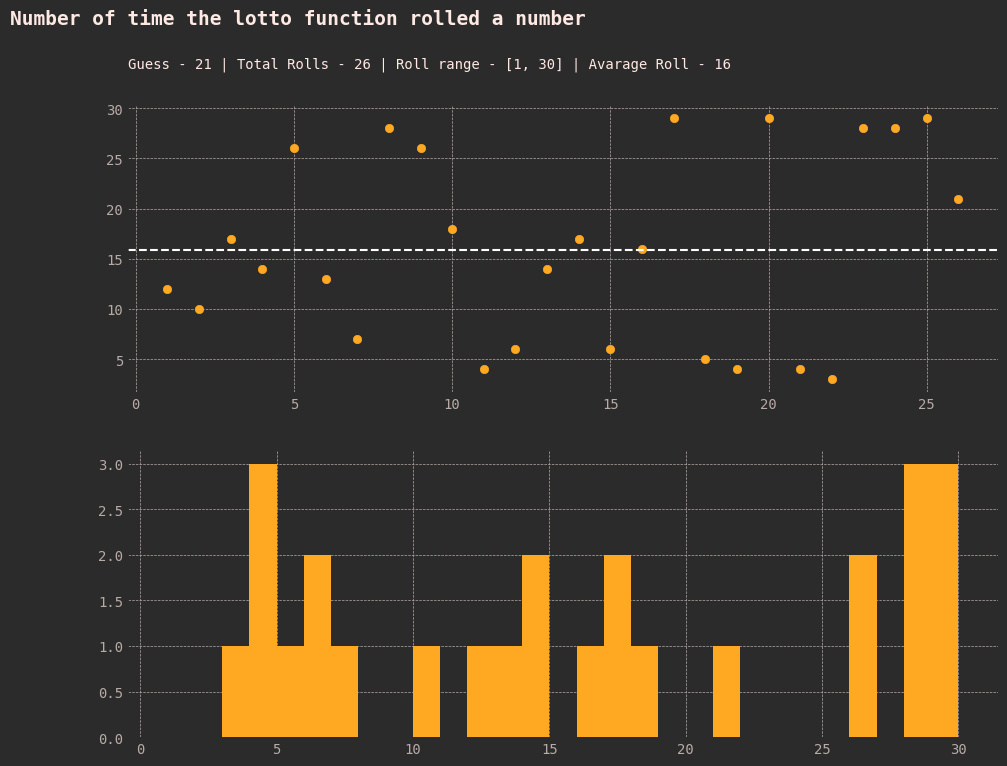

In [33]:
# plot the two last figurs at the same time
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,8))

# label
plt.ylabel(label_y)
plt.xlabel(label_x)

# init var
n_amount = []
bins = np.linspace(lotto_data["RANGE"][0],lotto_data["RANGE"][1],lotto_data["RANGE"][1])
lotto_amount = np.linspace(0,lotto_data["TOTAL ROLLS"],lotto_data["TOTAL ROLLS"]+1)
y_path = []
x_path = []

# ani
for i in range(0,lotto_data["TOTAL ROLLS"]):
    i = int(i)
    x_path.append(i+1)
    y_path.append(lotto_data["LIST"][i])
    
    average_roll = sum(y_path)/len(x_path)
    title = f"Guess - {lotto_data['GUESS']} | Total Rolls - {lotto_data['TOTAL ROLLS']} | Roll range - {lotto_data['RANGE']} | Avarage Roll - {int(round(average_roll,0))}"
    
    n_amount.append(lotto_data["LIST"][i-1])   
    
    ax1.scatter(x_path,y_path)
    ax2.hist(n_amount,bins=bins)
    plt.suptitle(suptitle,x=0.25,y=1,size=14,weight='bold')
    plt.title(title,loc="left",size=10,y=2.3)
    
    ax1.axhline(y = average_roll, color = 'w', linestyle = '--')

    display(fig)

    if i < lotto_data["TOTAL ROLLS"]-1:
        ax1.cla()
        ax2.cla()
    clear_output(wait = True)
    

### Oppgave 3 (20 poeng)

En bedrift produserer biler. Produktfunksjonen til bedriften defineres slik  $f(L, a, R) = 2RL^{a}$, hvor:
- `L` er arbeidskraft, 
- `a` er produktiviteten til arbeiderne og 
- `R` er antall robotmaskiner

a) Lag en formel for produktfunksjonen til bedriften og plot den grafisk med ulike verdier av `L` på x-aksen. Anta `a=0.6` og `R=2`

In [11]:
def product_function(workforce:float,productivity:float,amount_of_robot:float):
    product = 2*amount_of_robot*workforce**productivity
    return product

# test function
var_productivity = 0.6
var_amount_of_robot = 2
var_workforce = 1
print(product_function(var_workforce,var_productivity,var_amount_of_robot))

4.0


Text(0.5, 0, 'Workforce')

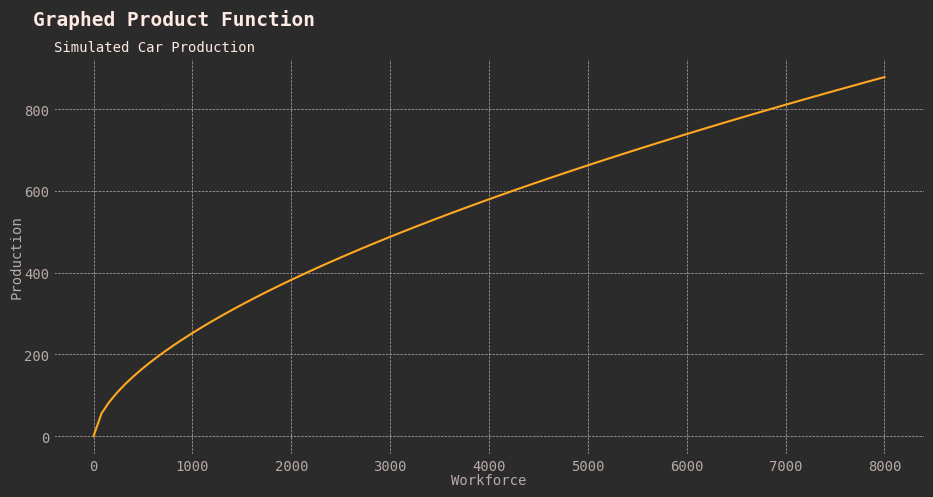

In [34]:
# set workforce range
var_workforce = np.linspace(0,8000,100)

# plot function
plt.figure(figsize=(10,5))
plt.suptitle("Graphed Product Function",x=0.20,y=0.98,size=14,weight='bold')
plt.title("Simulated Car Production",loc="left",size=10)
plt.plot(var_workforce,product_function(var_workforce,0.6,2))

plt.ylabel('Production')
plt.xlabel('Workforce')

b) anta at profittfunksjonen til denne bedriften er ${profit = f(L, a, R)p-wL-cR-K}$, hvor 
- `w` er månedslønnen til arbeiderne, 
- `c` er kostnaden for robotmaskinene 
- `K` er faste kostnader
- `p` er utsalgsprisen på bilene. 

Anta `a=0.6`,`R=6`, `p=300 000`, `w=100 000`, `c= 1 000 000` og `K=90 000 000`. Plot profittfunksjonen figurativt for antall arbeidere (`L`) mellom 0 og 10 000. Vis profitten i millioner (dvs at du må dele på 1 000 000)

In [35]:
def profit_function(productivity:float,workforce:float,amount_of_robot:float, monthly_salary:float,robot_cost:float,const_cost:float,retail_price:float):
    profit = product_function(workforce,productivity,amount_of_robot)*retail_price-monthly_salary*workforce-robot_cost*amount_of_robot-const_cost
    return profit/1_000_000

# test function and test var
var_productivity = 0.6
var_amount_of_robot = 6
var_retail_price = 300_000
var_monthly_salary = 100_000
var_robot_cost = 1_000_000
var_const_cost = 90_000_000
var_workforce = 1
print(
    profit_function(
        productivity=var_productivity,
        workforce=var_workforce,
        amount_of_robot=var_amount_of_robot,
        monthly_salary=var_monthly_salary,
        robot_cost=var_robot_cost,
        const_cost=var_const_cost,
        retail_price=var_retail_price))

-92.5


In [36]:
#equation = Eq((2*R*L**a)*p-w*L-c*R-K)
#equation = sym.Eq(sym.diff((2*var_amount_of_robot*L**var_productivity)*var_retail_price-var_monthly_salary*L-var_robot_cost*var_amount_of_robot-var_const_cost),0)
#print(solve(equation,"L"))

# function to find max
def find_maximum(expr,symb):
    derivation = sym.diff(expr)
    eq = sym.Eq(derivation,0)
    max_x = solve(eq,symb)
    return max_x
    

2168.37493200784
2168.37493200784 48558328.8005225


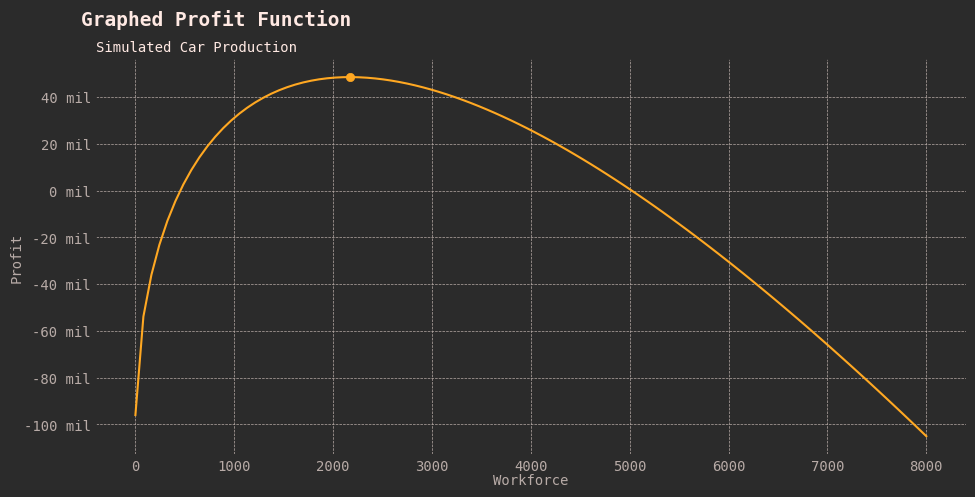

In [37]:
# setup
L = sym.symbols("L")
var_workforce = np.linspace(0,8000,100)
limit = False # set to True for ylim(0,50 000 000)

# run function
p = profit_function(
        productivity=var_productivity,
        workforce=var_workforce,
        amount_of_robot=var_amount_of_robot,
        monthly_salary=var_monthly_salary,
        robot_cost=var_robot_cost,
        const_cost=var_const_cost,
        retail_price=var_retail_price)

# calculate max
expr = (2*var_amount_of_robot*L**var_productivity)*var_retail_price-var_monthly_salary*L-var_robot_cost*var_amount_of_robot-var_const_cost
max_px = find_maximum(expr,"L")[0]
print(max_px)
max_py = (2*var_amount_of_robot*max_px**var_productivity)*var_retail_price-var_monthly_salary*max_px-var_robot_cost*var_amount_of_robot-var_const_cost
print(max_px,max_py)

# plot
fig, ax = plt.subplots(figsize=(10,5))

plt.suptitle("Graphed Profit Function",x=0.20,y=0.98,size=14,weight='bold')
plt.title("Simulated Car Production",loc="left",size=10)
plt.ylabel('Profit')
plt.xlabel('Workforce')

plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('{x:1.0f} mil')
if limit == True:
    plt.gca().set_ylim(bottom=0,top=50_000_000)
plt.plot(var_workforce,p)
plt.scatter(max_px,max_py/1_000_000,zorder=2)



c) Plot profitttfunksjonen for antall robostmaskiner `R=[3, 6, 9]` i samme plot (dvs at tre profittfunksjoner vises sammen). Bruk av "for loops" for å gjøre dette belønnes

ROBOTS_3: (383.318154644415, -67445456.3570390)
ROBOTS_6: (2168.37493200784, 48558328.8005225)
ROBOTS_9: (5975.33867376904, 299355911.584603)


Text(0.5, 0, 'Workforce')

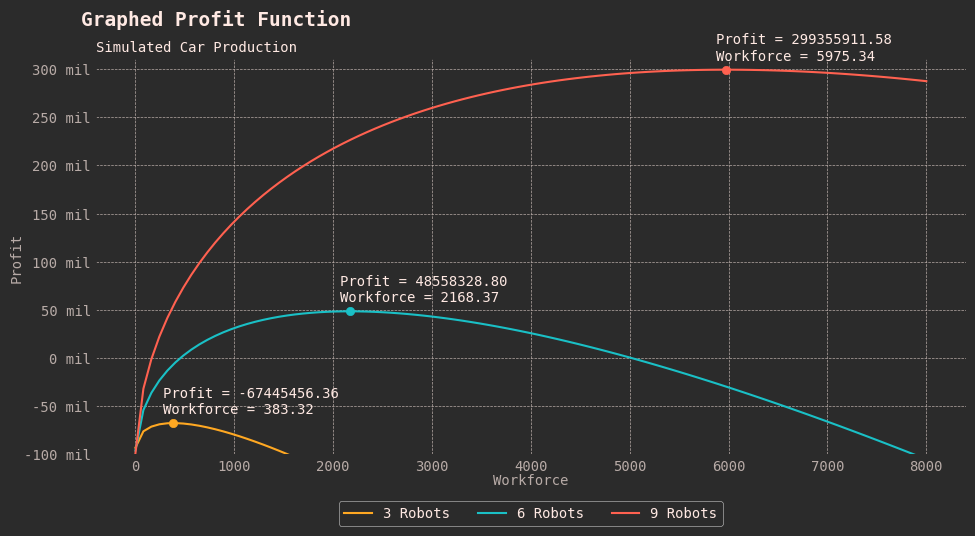

In [40]:
# setup
L = sym.symbols("L")
var_workforce = np.linspace(0,8000,100)
limit = True # set to True for ylim(-100_000_000,300 000 000)

p_l = []
i = 0


# plot
fig, ax = plt.subplots(figsize=(10,5))

plt.suptitle("Graphed Profit Function",x=0.20,y=0.98,size=14,weight='bold')
plt.title("Simulated Car Production",loc="left",size=10)
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('{x:1.0f} mil')

# check if limit/zoom is true
if limit == True:
    plt.gca().set_ylim(bottom=-100,top=310)

# plot multiple robots
for n in [3,6,9]:
    var_amount_of_robot=n
    p_l.append(profit_function(
        productivity=var_productivity,
        workforce=var_workforce,
        amount_of_robot=var_amount_of_robot,
        monthly_salary=var_monthly_salary,
        robot_cost=var_robot_cost,
        const_cost=var_const_cost,
        retail_price=var_retail_price))
    
    # calculate max
    expr = (2*var_amount_of_robot*L**var_productivity)*var_retail_price-var_monthly_salary*L-var_robot_cost*var_amount_of_robot-var_const_cost
    max_px = find_maximum(expr,"L")[0]
    max_py = (2*var_amount_of_robot*max_px**var_productivity)*var_retail_price-var_monthly_salary*max_px-var_robot_cost*var_amount_of_robot-var_const_cost
    print(f"ROBOTS_{n}: {max_px,max_py}")
    
    plt.plot(var_workforce,p_l[i],label=f"{n} Robots")
    plt.scatter(max_px,max_py/1_000_000,zorder=2)
    plt.text(max_px-100, max_py/1_000_000+10, f'Profit = {round(max_py,2)}\nWorkforce = {round(max_px,2)}', fontsize=10)
    i+=1

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5)

plt.ylabel('Profit')
plt.xlabel('Workforce')

d) finn profittmaksimum og optimal antall arbeidere ved hjelp av derivasjon med samme forutsetninger som i (1b). Bruk `sympy`-pakken til dette 

In [26]:
#pakker du kan få bruk for
#import sympy as sp 
#from sympy.solvers import solve

# I reffer back to previus assignment/task/problem 3c
# added plot.text

# used this code to find maxsimum
# code is used in the 3th code block up from here.
"""
def find_maximum(expr,symb):
    derivation = sym.diff(expr)
    eq = sym.Eq(derivation,0)
    max_x = solve(eq,symb)
    return max_x
"""

'\ndef find_maximum(expr,symb):\n    derivation = sym.diff(expr)\n    eq = sym.Eq(derivation,0)\n    max_x = solve(eq,symb)\n    return max_x\n'

e) vis figurativt med bruk av `fill_between` arealet hvor man taper penger (i rødt) og hvor man tjener penger (i grønt). Marker også profittmaksimum og antall arbeidere i profittmaksimum - gjerne ved bruk av `vlines`. Bruk ellers samme forutsetninger for argumentene som i oppgave (1b)

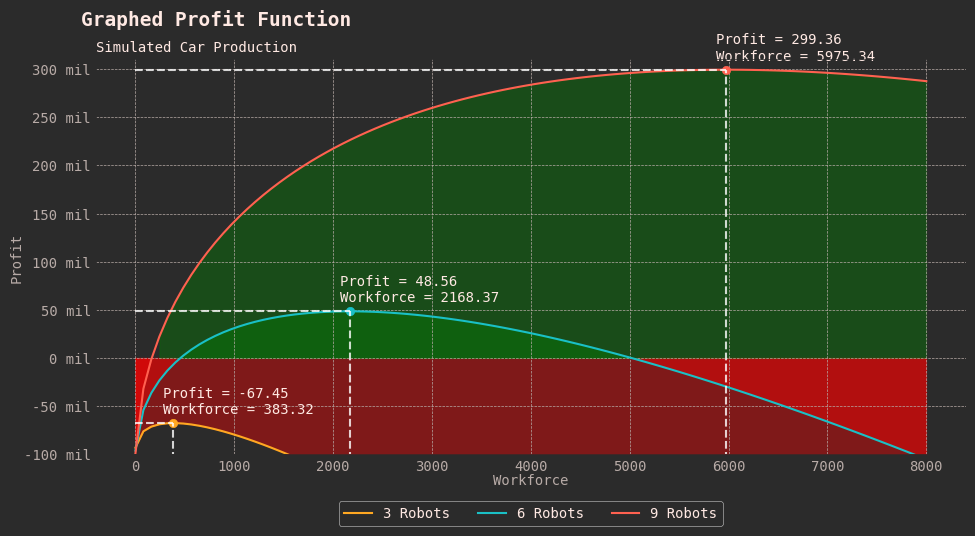

In [42]:
var_workforce = np.linspace(0,8000,100)

p_l = []
i = 0

limit = True # set to True for ylim(-100_000_000,300 000 000)

fig, ax = plt.subplots(figsize=(10,5))

plt.suptitle("Graphed Profit Function",x=0.20,y=0.98,size=14,weight='bold')
plt.title("Simulated Car Production",loc="left",size=10)
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('{x:1.0f} mil')
plt.ylabel('Profit')
plt.xlabel('Workforce')

if limit == True:
    plt.gca().set_ylim(bottom=-100,top=310)
    
max_graph_point = []

# plot multiple robots
for n in [3,6,9]:
    var_amount_of_robot=n
    p_l.append(profit_function(
        productivity=var_productivity,
        workforce=var_workforce,
        amount_of_robot=var_amount_of_robot,
        monthly_salary=var_monthly_salary,
        robot_cost=var_robot_cost,
        const_cost=var_const_cost,
        retail_price=var_retail_price))
    
    # calculate max
    expr = (2*var_amount_of_robot*L**var_productivity)*var_retail_price-var_monthly_salary*L-var_robot_cost*var_amount_of_robot-var_const_cost
    max_px = find_maximum(expr,"L")[0]
    max_py = ((2*var_amount_of_robot*max_px**var_productivity)*var_retail_price-var_monthly_salary*max_px-var_robot_cost*var_amount_of_robot-var_const_cost)/1_000_000
    max_graph_point.append([max_px,max_py])
    plt.plot(var_workforce,p_l[i],label=f"{n} Robots",zorder=1)
    plt.scatter(max_px,max_py,zorder=2)
    plt.text(max_px-100, max_py+10, f'Profit = {round(max_py,2)}\nWorkforce = {round(max_px,2)}', fontsize=10,zorder=2)
    i+=1

# fill colour
for p_l_item in p_l:
    plt.fill_between(var_workforce, p_l_item,0, color='green',alpha=0.4,zorder=0,where = p_l_item>=0 )
    plt.fill_between(var_workforce,p_l_item,0, color='red',alpha=0.4,zorder=0,where = p_l_item<0)
    if min(p_l_item) < min_p_l:
        min_p_l = min(p_l_item)
    
# lines
for p_l_item,point in zip(p_l,max_graph_point):
    plt.vlines(point[0], min_p_l, point[1], linestyles ="dashed", colors ="w",alpha=0.8,)
    plt.hlines(point[1], 0, point[0], linestyles ="dashed", colors ="w",alpha=0.8,)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5)

f) Plot nå to figurer sammen der du viser hva optimal antall arbeidere gir i profitt (slik som i (2e)) og produksjon av antall biler (som du får fra produktfunksjonen). Marker optimum med vlines. Ha grafen med profittfunksjonen over grafen med produktfunksjonen. Du kan bruke `fig, (ax1, ax2) = plt.subplots(2)` når du skal gjøre dette. <br>

<b> Hint: </b> Du kan finne antall biler som blir produsert ved å bruke antall arbeidere i profittmaksimum, i produktfunksjonen.


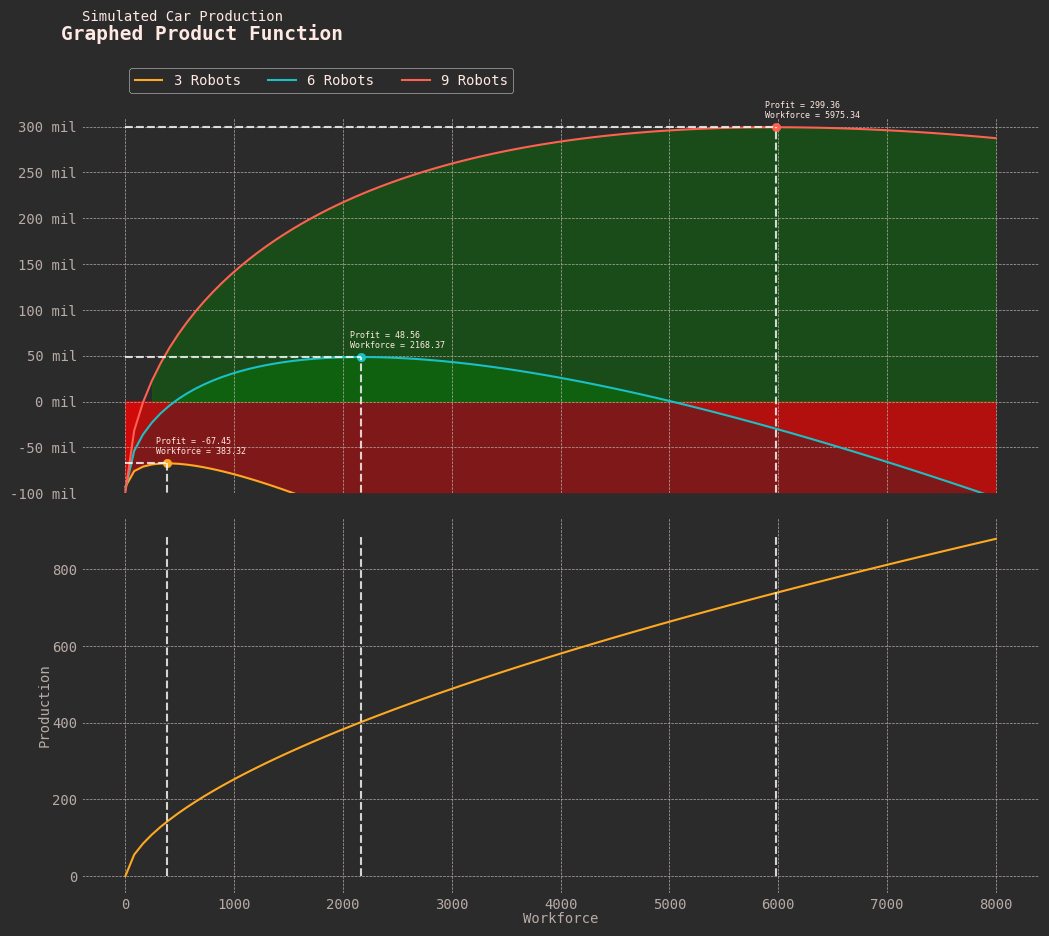

In [43]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,8))
fig.tight_layout(pad=0)
var_workforce = np.linspace(0,8000,100)

plt.suptitle("Graphed Product Function",x=0.15,y=1.11,size=14,weight='bold')
plt.title("Simulated Car Production",loc="left",y=2.30,size=10)
plt.ylabel('Production')
plt.xlabel('Workforce')

ax2.plot(var_workforce,product_function(var_workforce,0.6,2))

p_l = []
i = 0

limit = True # set to True for ylim(-100_000_000,300 000 000)

ax1.ticklabel_format(style='plain')
ax1.yaxis.set_major_formatter('{x:1.0f} mil')

if limit == True:
    ax1.set_ylim(bottom=-100,top=310)
    
max_graph_point = []

# plot multiple robots
for n in [3,6,9]:
    var_amount_of_robot=n
    p_l.append(profit_function(
        productivity=var_productivity,
        workforce=var_workforce,
        amount_of_robot=var_amount_of_robot,
        monthly_salary=var_monthly_salary,
        robot_cost=var_robot_cost,
        const_cost=var_const_cost,
        retail_price=var_retail_price))
    
    # calculate max
    expr = (2*var_amount_of_robot*L**var_productivity)*var_retail_price-var_monthly_salary*L-var_robot_cost*var_amount_of_robot-var_const_cost
    max_px = find_maximum(expr,"L")[0]
    max_py = ((2*var_amount_of_robot*max_px**var_productivity)*var_retail_price-var_monthly_salary*max_px-var_robot_cost*var_amount_of_robot-var_const_cost)/1_000_000
    max_graph_point.append([max_px,max_py])
    ax1.plot(var_workforce,p_l[i],label=f"{n} Robots",zorder=1)
    ax1.scatter(max_px,max_py,zorder=2)
    ax1.text(max_px-100, max_py+10, f'Profit = {round(max_py,2)}\nWorkforce = {round(max_px,2)}', fontsize=6,zorder=2)
    ax1.axes.get_xaxis().set_ticklabels([])
    i+=1
    
min_p_l = p_l[0][0]

# fill colour
for p_l_item in p_l:
    ax1.fill_between(var_workforce, p_l_item,0, color='green',alpha=0.4,zorder=0,where = p_l_item>=0 )
    ax1.fill_between(var_workforce,p_l_item,0, color='red',alpha=0.4,zorder=0,where = p_l_item<0)
    if min(p_l_item) < min_p_l:
        min_p_l = min(p_l_item)

# line
for p_l_item,point in zip(p_l,max_graph_point):
    ax1.vlines(point[0], min_p_l, point[1], linestyles ="dashed", colors ="w",alpha=0.8,)
    ax1.hlines(point[1], 0, point[0], linestyles ="dashed", colors ="w",alpha=0.8,)
    ax2.vlines(point[0], 0, 890, linestyles ="dashed", colors ="w",alpha=0.8,)
    
ax1.legend(loc='upper center', bbox_to_anchor=(0.25, 1.15),ncol=5)

### Oppgave 4 (10 poeng)
I denne oppgaven skal vi hente ut et datasett fra eurostat på investeringer i hosholdningen. Bruk koden under til å hente ut dataene.
<br><b>NB!:</b> Husk at dere må ha innstallert pakken `eurostat`. Dette gjør dere med å åpne "Terminal" og kjøre  `pip install eurostat`.

In [48]:
import eurostat

inv_data = eurostat.get_data_df('tec00098')


a) Bytt navn på kolonnen "geo\\time" til "country" ved bruk av en av kodene under. Fjern så alle kolonner utenom "country" og alle årstallene. 
<br> <b>NB!:</b> Noen vil få en ekstra første kolonne som heter "freq" eller noe annet. Da må dere bruke versjon 2 av koden under. 

In [190]:
# inv_data.columns = ['unit',   'sector',  'na_item', 'country'] + list(range(2010, 2022)) #v1
# note to self, this does not work

In [49]:
inv_data.columns = ['freq', 'unit',   'sector',  'na_item', 'country'] + list(range(2010, 2022)) #v2 


In [50]:
inv_data = inv_data.drop(columns=['freq', 'unit','sector','na_item'])
print(inv_data.columns)

Index(['country',      2010,      2011,      2012,      2013,      2014,
            2015,      2016,      2017,      2018,      2019,      2020,
            2021],
      dtype='object')


b) fjern radene med nan verdi. Sett deretter indeksen til "country". <br> <b> Hint: </b> En metode er å bruke `isna()` og `any()` over radaksene (dvs. `axis=1`)

In [51]:
inv_data2 = inv_data.dropna()
inv_data2 = inv_data2.set_index(inv_data2['country'])
inv_data2 = inv_data2.drop(columns=['country'])
print(inv_data2)

            2010   2011   2012   2013   2014   2015   2016   2017   2018  \
country                                                                    
AT          8.44   8.60   8.47   8.58   8.30   8.36   8.29   8.69   8.81   
BE          9.82   9.45   9.37   9.03   9.45   9.31   9.33   9.28   9.35   
CY         13.72  10.73   8.74   7.53   7.15   6.69   8.02   8.97  11.30   
CZ         11.14   9.82   8.74   8.77   8.88   8.84   9.18   7.86   9.00   
DE          8.72   9.51   9.61   9.56   9.65   9.32   9.62   9.48   9.68   
DK          8.50   8.51   7.87   7.35   7.60   7.50   7.46   8.10   8.33   
EA19        9.30   9.21   8.80   8.37   8.24   8.09   8.35   8.52   8.71   
EE          6.14   6.47   6.84   7.52   7.79   7.94   8.52   8.99   8.68   
EL          9.12   8.54   6.28   4.90   3.16   2.72   2.75   2.69   2.44   
ES          9.66   7.85   6.48   4.84   4.72   4.57   4.60   5.17   5.42   
EU27_2020   9.07   8.95   8.56   8.12   8.06   7.97   8.22   8.42   8.54   
FI         1

c) Lag et nytt datasett hvor du kun har med de nordiske landene (dvs. "NO", "SE", "DK", "FI"). Det kan være nyttig å bruke `isin` til dette. Bytt så om på kolonner og rader ved hjelp av `transpose`. 

In [52]:
inv_data_nordic = inv_data2.loc[["NO", "SE", "DK", "FI"]]
inv_data_nordic_T = inv_data_nordic.T
print("\ninv_data_nordic:\n",inv_data_nordic)
print("\n","-"*35,"\n\ninv_data_nordic_T:\n",inv_data_nordic_T)
# add transpose


inv_data_nordic:
           2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
country                                                                         
NO        9.71  10.98  11.74  12.32  11.82  11.35  12.34  13.02  12.22  11.89   
SE        5.86   5.48   4.51   4.61   4.69   5.69   6.15   6.77   6.24   5.88   
DK        8.50   8.51   7.87   7.35   7.60   7.50   7.46   8.10   8.33   8.57   
FI       11.66  12.18  12.12  11.49  10.88  10.49  11.57  12.09  12.50  12.25   

          2020   2021  
country                
NO       11.29  11.11  
SE        6.48   6.84  
DK        8.69   9.24  
FI       11.91  12.50  

 ----------------------------------- 

inv_data_nordic_T:
 country     NO    SE    DK     FI
2010      9.71  5.86  8.50  11.66
2011     10.98  5.48  8.51  12.18
2012     11.74  4.51  7.87  12.12
2013     12.32  4.61  7.35  11.49
2014     11.82  4.69  7.60  10.88
2015     11.35  5.69  7.50  10.49
2016     12.34  6.15  7.46  11.57
2017     13.02  6.

d) Lag en ny kolonne som du kaller "mean". Denne skal være gjennomsnittet av alle de nordiske landene for hvert av årene (dvs at du må ta gjennomsnittet over radene). Plot så dette og kall y-aksen for "investering"

In [53]:
inv_data_nordic_T["mean"] = 0 # just here to reset mean column
inv_data_nordic_T["mean"] = inv_data_nordic_T.sum(axis = 1)/(inv_data_nordic_T.shape[1]-1)
print(inv_data_nordic_T)
print(list(inv_data_nordic_T.index))
inv_data_nordic_country_average = inv_data_nordic_T.mean()
print(inv_data_nordic_country_average)

country     NO    SE    DK     FI    mean
2010      9.71  5.86  8.50  11.66  8.9325
2011     10.98  5.48  8.51  12.18  9.2875
2012     11.74  4.51  7.87  12.12  9.0600
2013     12.32  4.61  7.35  11.49  8.9425
2014     11.82  4.69  7.60  10.88  8.7475
2015     11.35  5.69  7.50  10.49  8.7575
2016     12.34  6.15  7.46  11.57  9.3800
2017     13.02  6.77  8.10  12.09  9.9950
2018     12.22  6.24  8.33  12.50  9.8225
2019     11.89  5.88  8.57  12.25  9.6475
2020     11.29  6.48  8.69  11.91  9.5925
2021     11.11  6.84  9.24  12.50  9.9225
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
country
NO      11.649167
SE       5.766667
DK       8.143333
FI      11.803333
mean     9.340625
dtype: float64


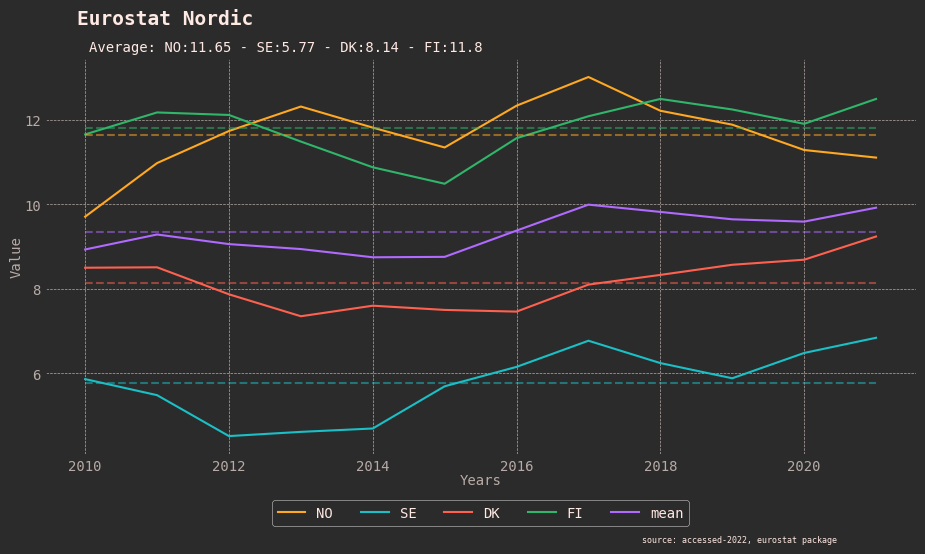

In [55]:
L = sym.symbols("L")
years = list(inv_data_nordic_T.index)
source = 'source: accessed-2022, eurostat package'

fig, ax = plt.subplots(figsize=(10,5))
title = "Average: "
for value in list(inv_data_nordic_country_average.index)[:-1]:
    space = "" if value == "NO" else " - "
    title = title+space+f"{value}:{round(inv_data_nordic_country_average[value],2)}"
    
plt.suptitle("Eurostat Nordic",x=0.20,y=0.98,size=14,weight='bold')
plt.title(title,loc="left",size=10,x=0.05)
plt.ticklabel_format(style='plain')
plt.ylabel('Value')
plt.xlabel('Years')
plt.text((years[-1]-len(source)/len(years)),2, source,fontsize=6)

plt.plot(years,inv_data_nordic_T,label=list(inv_data_nordic_T))
plt.hlines(inv_data_nordic_country_average, years[0], years[-1], linestyles ="dashed", colors = ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"],alpha=0.5,)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5)
